In [345]:
import csv
import numpy as np
import seaborn as sns
import pandas as pd

! sh ~/Projects/coursework/mpi_collective/copy_txt_to_local.sh
! rm -rf ./txt_barrier
! rm -rf ./txt_alltoall
! cp -r ~/Projects/coursework/mpi_collective/txt_barrier ./txt_barrier
! cp -r ~/Projects/coursework/mpi_collective/txt_alltoall ./txt_alltoall
! ls

   Lomonosov-2 supercomputer welcomes you!


barrier.txt                                   100% 5641   177.4KB/s   00:00    
barrier.csv                                   100% 4365   268.2KB/s   00:00    
   Lomonosov-2 supercomputer welcomes you!


alltoall.csv                                  100%  834    42.2KB/s   00:00    
alltoall.txt                                  100%  686    24.3KB/s   00:00    
Untitled.ipynb txt_alltoall   txt_barrier


https://seaborn.pydata.org/examples/simple_violinplots.html


In [346]:
def print_results(test_type):
    txt_path = f"./txt_{test_type}/{test_type}.txt"
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(txt_path, "r") as txt_file:
        for row in txt_file:
            if row.startswith(test_type):
                print(row, end="")
        
    print()

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            mean = sum(a)/len(a)
            xmin = min(a)
            xmax = max(a)
            
            print(f'{timestr}\n{a}\nmean = {mean}\nmin = {xmin}\nmax = {xmax}\n')
    
    

In [347]:
print_results("barrier")
print(f"\n{'-' * 70}\n")
print_results("alltoall")

barrier,100000,4.347500e+02,2022-04-20,19:19:09,19:26:24
barrier,100000,2.601351e+00,2022-04-20,19:51:59,19:52:02
barrier,100000,4.310270e+02,2022-04-20,21:06:51,21:14:02
barrier,100000,8.295510e+02,2022-04-20,21:44:40,21:58:30
barrier,100000,6.893832e+02,2022-04-21,16:46:49,16:58:19
barrier,100000,4.842972e+02,2022-04-21,17:14:03,17:22:08
barrier,100000,8.413594e+02,2022-04-21,17:22:29,17:36:31
barrier,75500,5.173182e+02,2022-04-21,20:43:34,20:52:12
barrier,75500,8.214560e+02,2022-04-21,20:52:31,21:06:13
barrier,75500,4.224638e+02,2022-04-21,21:06:33,21:13:36
barrier,75500,5.110030e+02,2022-04-22,07:32:30,07:41:02
barrier,75500,8.695292e+02,2022-04-22,07:41:21,07:55:51
barrier,75500,4.966972e+02,2022-04-22,07:56:10,08:04:27
barrier,256,3.630000e-07,2022-04-22,08:53:05,08:53:05

19:26:24
[5.223199, 3.8763, 3.8844, 3.9684, 4.091, 4.0785, 4.5366, 4.8708, 4.3476, 4.600999]
mean = 4.3477798000000005
min = 3.8763
max = 5.223199

19:52:02
[2.180212, 5.182201, 3.678012, 5.1764, 5.181793, 5.18

In [348]:
def get_results_data(test_type):
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        data = {}
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            data[timestr] = a
        return data

In [349]:
all_data = get_results_data("barrier")
all_data = get_results_data("alltoall")
sep_data = {}
for time in all_data:
    arr = all_data[time]
    num = len(arr)
    if not (num in sep_data):
        sep_data[num] = {}
    sep_data[num][time] = arr
    
sep_data
for d in sep_data:
    print(d, end=' ')
    
data = pd.DataFrame(sep_data[10])
data_mean = pd.DataFrame(data.mean(axis=0), columns=['mean'])
data

10 

,19:02:11,19:53:44,21:05:12,09:08:17,09:17:49,09:31:18
0,6.150199,3.462122,6.488798,1.357413,1.329809,1.569779
1,4.321499,2.769521,4.417599,1.370270,5.743050,1.274250
2,4.913799,2.770483,4.077599,1.178924,6.571798,1.500365
3,4.208798,4.449256,3.708399,1.232240,4.305198,1.353670
4,3.820400,2.619606,4.017399,9.365299,4.145549,5.739441
5,3.664099,3.050776,3.649199,3.350754,3.755199,3.170158
6,4.116800,2.770898,4.218799,3.242898,5.410298,3.284039
7,4.776599,2.771655,5.145199,3.461598,4.284847,3.177557
8,5.391499,2.621295,3.817799,3.453845,3.892247,3.128138
9,4.709298,2.771268,3.755700,3.732562,3.734098,3.391237


[(1.0, 10.0), (-0.5, 5.5)]

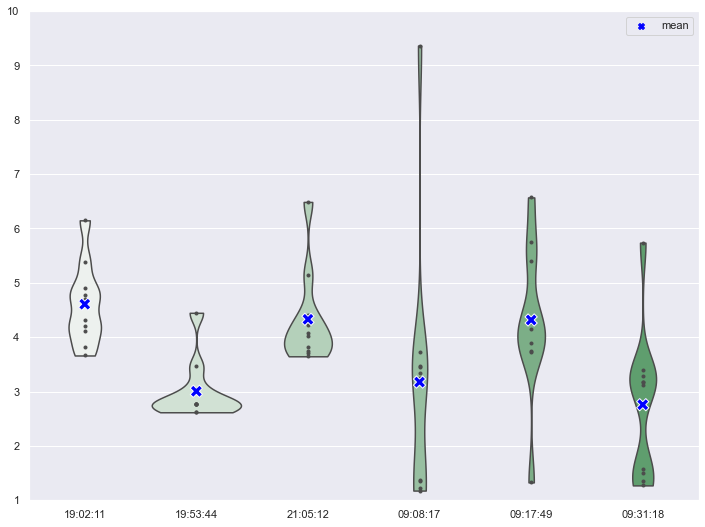

In [350]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12, 9)})
sns.violinplot(data=data, palette="light:g", cut=0, inner="points", bw=0.3)
sns.scatterplot(data=data_mean, palette=['blue'], s=150, markers=['X'])\
.set(xlim=(-0.5, len(data.columns) - 0.5), ylim=(1, 10))

In [351]:
! cp ./Untitled.ipynb ~/Projects/coursework/mpi_collective/Untitled.ipynb